# Regression on medical equip data

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

/opt/homebrew/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version. The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/opt/homebrew/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('ggplot2')
require('ggrepel')
require('readr')
require('extrafont')
require('dplyr')
require('reshape2')
# require('theme538')

R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: ggrepel

R[write to console]: Loading required package: readr

R[write to console]: Loading required package: extrafont

R[write to console]: Registering fonts with R

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: reshape2



In [4]:
%%R 

# EXAMPLE R CELL
df <- read_csv('merged_income_age.csv', show_col_types = FALSE)
df

R[write to console]: New names:
• `` -> `...1`



# A tibble: 178 × 5
    ...1 August median_household_income   zip percent_elderly
   <dbl>  <dbl>                   <dbl> <dbl>           <dbl>
 1     0   2.54                   96787 10001          12.6  
 2     1   2.59                   35607 10002          23.7  
 3     2   2.69                  129981 10003          12.7  
 4     3   2.10                  204949 10004           8.40 
 5     4   3.24                  184681 10005           1.06 
 6     5   5.07                  185268 10006           0.521
 7     6   2.05                  250001 10007           5.60 
 8     7   2.61                   68220 10009          14.9  
 9     8   2.33                  139188 10010          16.6  
10     9   1.83                  136208 10011          16.4  
# … with 168 more rows


R[write to console]: `geom_smooth()` using formula 'y ~ x'



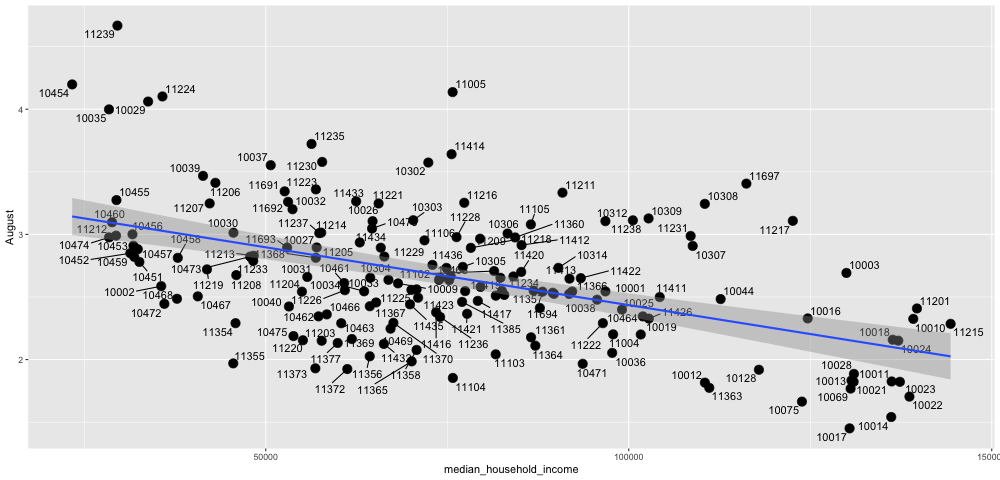

In [26]:
%%R -w 1000

ggplot(df %>% filter(median_household_income < 150000), aes(x=median_household_income, y=August)) + 
    geom_point(size=4) +
    geom_text_repel(aes(label=zip)) + 
    geom_smooth(method='lm') +
    scale_color_continuous(low = "white", high = "blue", limits = c(0, 50)) 
    

R[write to console]: `geom_smooth()` using formula 'y ~ x'



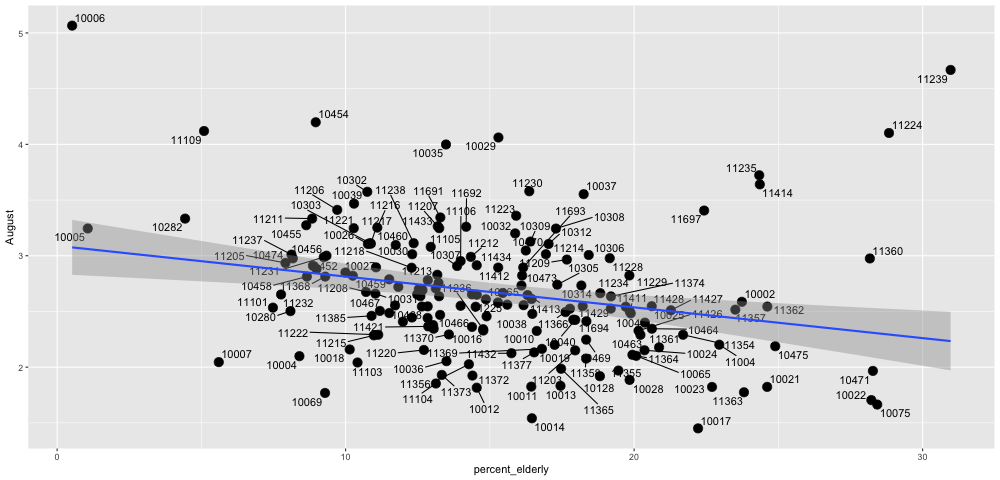

In [20]:
%%R -w 1000

ggplot(df%>% filter(zip!=11005), aes(x=percent_elderly , y=August)) + 
    geom_point(size=4) +
    geom_text_repel(aes(label=zip)) + 
    geom_smooth(method='lm') +
    scale_color_continuous(low = "white", high = "blue", limits = c(0, 50)) 
    

In [23]:
%%R

summary(lm(August ~ percent_elderly, df))


Call:
lm(formula = August ~ percent_elderly, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.21583 -0.35074 -0.06732  0.30943  2.36217 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.704388   0.097823  27.646   <2e-16 ***
percent_elderly -0.001712   0.005597  -0.306     0.76    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5819 on 176 degrees of freedom
Multiple R-squared:  0.000531,	Adjusted R-squared:  -0.005148 
F-statistic: 0.09351 on 1 and 176 DF,  p-value: 0.7601



In [27]:
%%R
# What's up with the outliers?
summary(lm(August ~ median_household_income, df %>% filter(median_household_income < 150000)))



Call:
lm(formula = August ~ median_household_income, data = df %>% 
    filter(median_household_income < 150000))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.96880 -0.30204 -0.04636  0.25710  1.58206 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              3.359e+00  1.018e-01  33.000  < 2e-16 ***
median_household_income -9.237e-06  1.255e-06  -7.358  7.9e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4742 on 168 degrees of freedom
Multiple R-squared:  0.2437,	Adjusted R-squared:  0.2392 
F-statistic: 54.14 on 1 and 168 DF,  p-value: 7.901e-12



In [30]:
import plotly.express as px

df = pd.read_csv('merged_income_age.csv').query("zip!=11005")

fig = px.scatter_3d(df, 
                    x='median_household_income', 
                    y='percent_elderly', 
                    z='August')
fig.show()

In [46]:
%%R
# What's up with the outliers (fidi)?

summary(lm(August ~ median_household_income + percent_elderly, df %>% 
           filter(median_household_income < 150000) %>%
           filter(zip!= 11005)))



Call:
lm(formula = August ~ median_household_income + percent_elderly, 
    data = df %>% filter(median_household_income < 150000) %>% 
        filter(zip != 11005))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94084 -0.29378 -0.04069  0.25253  1.65498 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              3.395e+00  1.364e-01  24.895  < 2e-16 ***
median_household_income -9.068e-06  1.275e-06  -7.110 3.28e-11 ***
percent_elderly         -3.671e-03  7.706e-03  -0.476    0.634    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4626 on 166 degrees of freedom
Multiple R-squared:  0.2559,	Adjusted R-squared:  0.247 
F-statistic: 28.55 on 2 and 166 DF,  p-value: 2.206e-11

